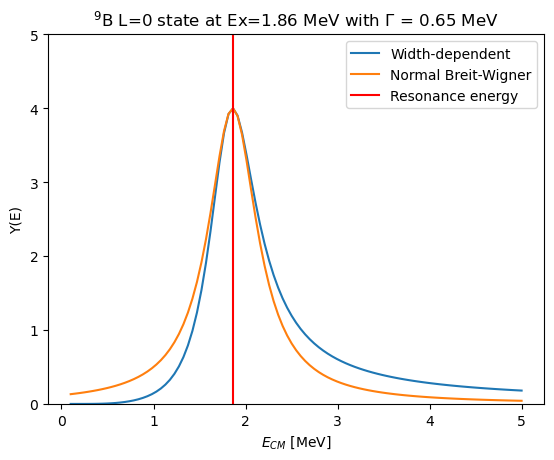

In [24]:
# Reference: https://www.osti.gov/servlets/purl/1281675

from mpmath import *
import numpy as np
import matplotlib.pyplot as plt

def F(l, eta, z):
    out = []
    try: #numpy array
        for n in range(len(eta)):
            out.append(coulombf(l,eta[n],z[n]))
        return np.array(out)
    except: #Single val
        return coulombf(l,eta,z)
def G(l, eta, z):
    out = []
    try:
        for n in range(len(eta)):
            out.append(coulombg(l,eta[n],z[n]))
        return np.array(out)
    except: #Single val
        return coulombg(l,eta,z)

def Pl(l, eta, z):
    return z/(F(0,eta,z)**2+G(0,eta,z)**2) #Penetrability = ka/(F^2+G^2)

#Constants
hbar = 197 #MeV/fm
e2 = 1.6e-19**2
amu = 931.5 #MeV/c2
alpha = 1./137.
#Inputs
l = 0
M1 = 8 #in amu
M2 = 1 #in amu
a = 1.4*(M1**(1/3)+M2**(1/3)) #fm
Z1 = 4 #in units of e
Z2 = 1 #in units of e
mu = (M1*M2)/(M1+M2)
E = np.linspace(0.1,5,101) #MeV

#Ex state
Ex = 1.86 #MeV
Gamma = 0.650 #MeV

#
k = np.sqrt((2*mu*amu*E))/hbar #fm^-1
eta = alpha*Z1*Z2*np.sqrt((mu*amu)/(2*E))
z = k*a

k_res = np.sqrt((2*mu*amu*Ex))/hbar #fm^-1
eta_res = alpha*Z1*Z2*np.sqrt((mu*amu)/(2*Ex))
z_res = k_res*a

g2 = Gamma/(2*Pl(l,eta_res,z_res)) #reduced width at pole (ignoring shifts for now)
width = 2*Pl(l,eta,z)*g2#Gamma=2*Pl(E)*g2

lineshape = width**2/((E-Ex)**2+width**2*0.25)
lineshape_ = Gamma**2/((E-Ex)**2+Gamma**2*0.25)
plt.plot(E,lineshape,label="Width-dependent")
plt.plot(E,lineshape_,label="Normal Breit-Wigner")
#plt.yscale('log')
plt.xlabel("$E_{CM}$ [MeV]")
plt.ylabel("Y(E)")
plt.axvline(x=Ex,c="red",label="Resonance energy")
plt.title(f"$^{9}$B L={l} state at Ex={Ex} MeV with $\Gamma$ = {Gamma} MeV")
plt.ylim(0,5)
plt.legend()
plt.show()